    LaTeX генератор таблиц (наконец-то полноценный, ориентация вертикальная):

In [5]:
print ("Введите данные:")
no_parse_data = input().split(' ')
data = [i_stolb.split() for i_stolb in no_parse_data]
# print (data)

output = "\hline\n"
for i_str in range (len (data[0])):
    for i_stolb in range (len (data)):
        output += data[i_stolb][i_str] + " & "
    output = output[0:-2] + "\\\\ \hline\n"

print (output)

Введите данные:
\hline
0 & 91 & 6.48 & 108.37 \\ \hline
3.37 & 91.25 & 6.26 & 106.48 \\ \hline
3.72 & 93.25 & 5.92 & 105.1 \\ \hline
4.01 & 94.93 & 5.52 & 103.02 \\ \hline
4.47 & 97.53 & 5.34 & 102.05 \\ \hline
4.76 & 99.15 & 4.87 & 99.25 \\ \hline
5.25 & 102.05 & 4.64 & 98.05 \\ \hline
5.47 & 103.33 & 3.8 & 93.55 \\ \hline
5.78 & 105.12 & 3.5 & 92.02 \\ \hline
6.28 & 107.15 & 3.22 & 90.25 \\ \hline
6.48 & 108.37 & 2.76 & 87.67 \\ \hline
--- & --- & 2.26 & 84.97 \\ \hline
--- & --- & 1.41 & 80.52 \\ \hline
--- & --- & 0 & 75.4 \\ \hline



    А вот горизонтальная:

In [1]:
print ("Введите данные:")
data = input()
data = data.replace (' ',  "\\\\ \hline\n")
data = data.replace ('\t', " & ")
print ("\hline", data, "\\\\ \hline\n", sep = '\n')

Введите данные:
\hline
m & 1 & 2 & 3 & 4 & 5 & 6\\ \hline
r,\\ \hline
мм & 27 & 37 & 45 & 52 & 59 & 67\\ \hline
r^2,\\ \hline
мм^2 & 729 & 1369 & 2025 & 2704 & 3481 & 4489
\\ \hline



    Теперь основная часть:

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from math import sqrt
from math import log as ln

In [2]:
def MNK (x, y):
    mid = lambda mass: sum (mass) / len (mass)

    # y = k * x + b
    mid_xy = [x[i] * y[i] for i in range (len (x))]
    mid_xy = mid (mid_xy)

    mid_x_pow2 = [x_i ** 2 for x_i in x]
    mid_x_pow2 = mid (mid_x_pow2)
    
    mid_y_pow2 = [y_i ** 2 for y_i in y]
    mid_y_pow2 = mid (mid_y_pow2)

    mid_y = mid (y)
    mid_x = mid (x)

    k = (mid_xy - mid_x * mid_y ) / (mid_x_pow2 - mid_x ** 2)
    b = mid_y - k * mid_x
    
    sigma_k = 1 / sqrt (len  (x)) * sqrt ((mid_y_pow2 - mid_y ** 2) / (mid_x_pow2 - mid_x ** 2) - k ** 2)
    sigma_b = sigma_k * sqrt (mid_x_pow2 - mid_x ** 2)
    
    return [k, b, sigma_k, sigma_b]

In [3]:
m = list (map (int, input("m: ").split()))
r_2  = list (map (float, input("r_2: ").split()))

k, b, sigma_k, sigma_b = MNK (m, r_2)
print (k, b, sigma_k, sigma_b, sep = '\n')

737.5714285714294
-115.33333333333621
26.59280587420052
45.41586208694232


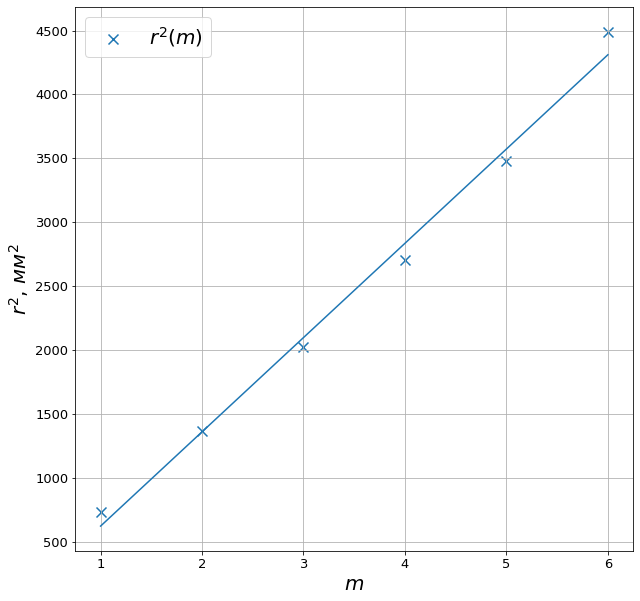

In [9]:
plt.rc('font', size = 13) 
fig = plt.figure(figsize = (10, 10))
ax  = fig.add_subplot(1,1,1)

linear = lambda x: k * x + b

ax.scatter (m, r_2, marker = 'x', label = "$r^2 (m)$", s=100)
ax.plot ([m[0], m[-1]], [linear (m[0]), linear (m[-1])])

ax.set_xlabel('$m$', fontsize = 20)
ax.set_ylabel('$r^2$, $мм^2$',  fontsize = 20)

plt.legend(fontsize = 20)
ax.grid(True)

plt.savefig ("Picturies/graph.pdf")